In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

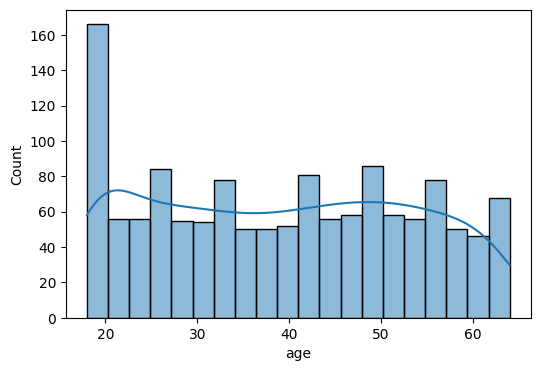

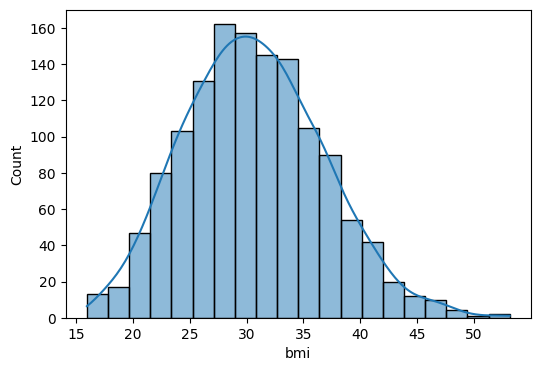

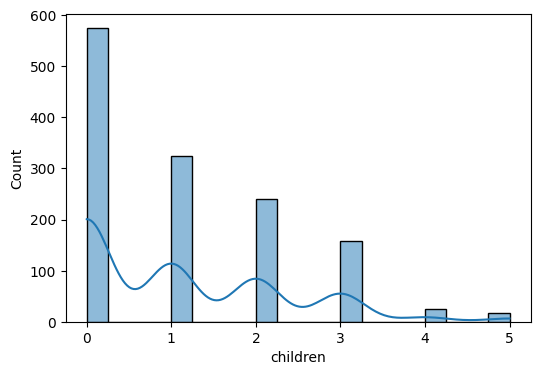

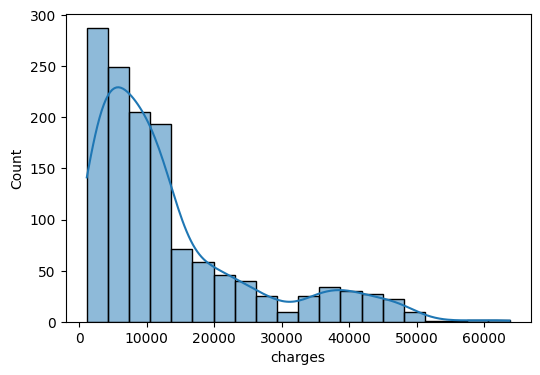

In [9]:
numeric = ['age', 'bmi', 'children', 'charges']
for col in numeric:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde = True, bins = 20)

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: xlabel='children', ylabel='count'>

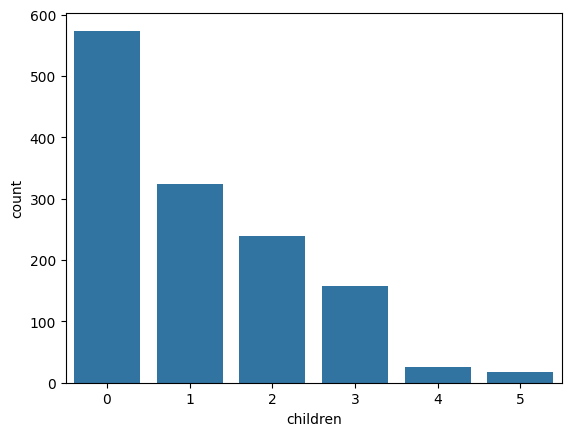

In [11]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

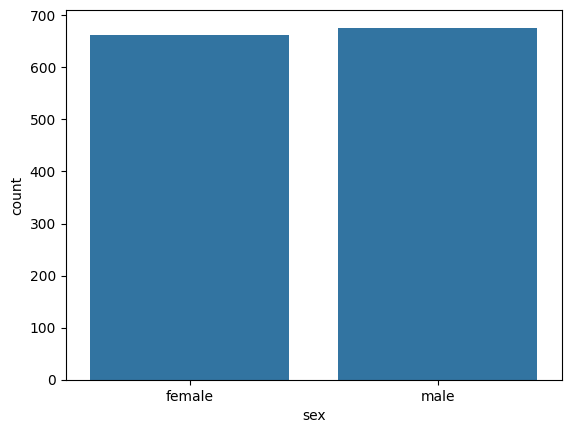

In [12]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

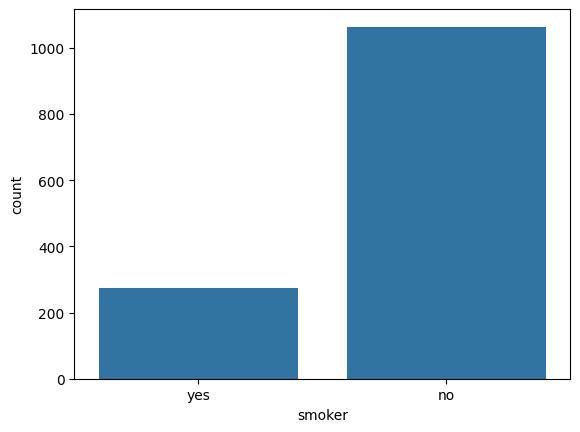

In [13]:
sns.countplot(x = df['smoker'])

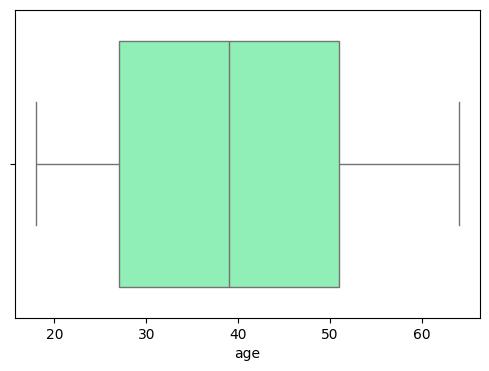

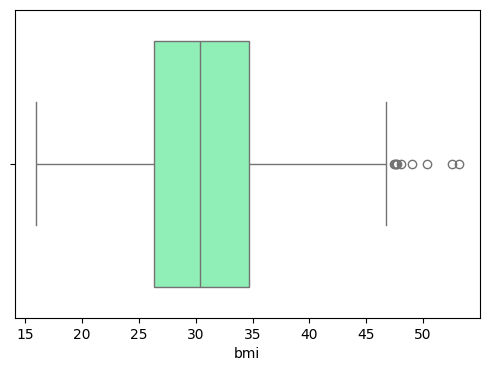

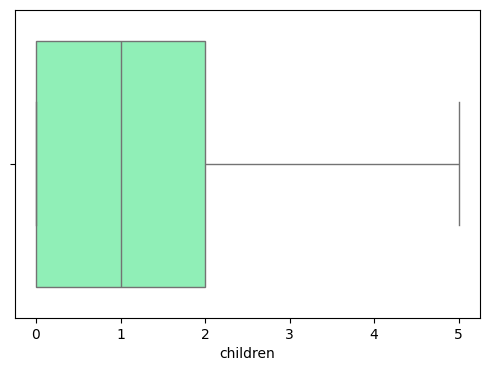

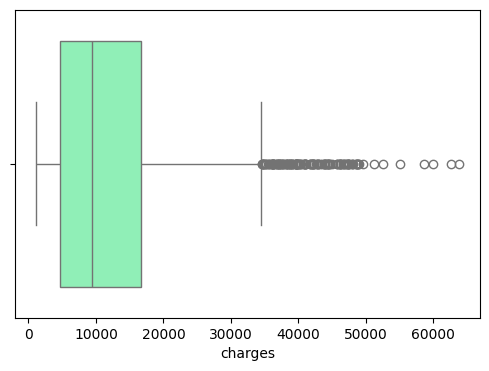

In [14]:
numeric = ['age', 'bmi', 'children', 'charges']
for col in numeric:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x = df[col], palette="rainbow")

<Axes: >

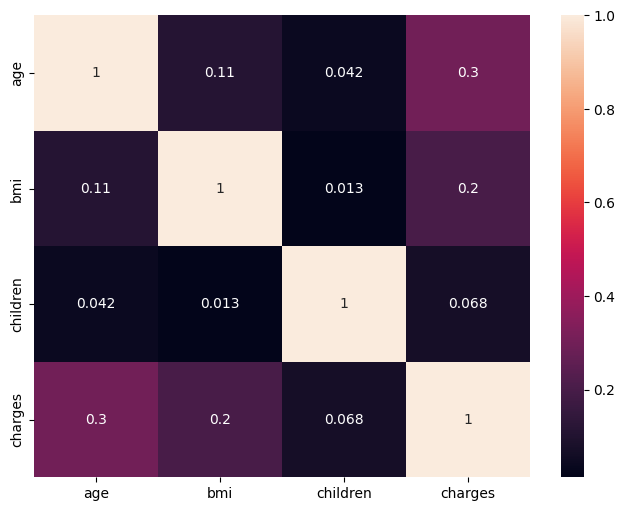

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# DATA CLEANING AND PREPROCESSING

In [16]:
df2 = df.copy()

In [17]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
df2.shape

(1338, 7)

In [19]:
df2.drop_duplicates(inplace= True)

In [20]:
df2.shape

(1337, 7)

In [21]:
df2.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [22]:
df2.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [23]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [24]:
df2['sex'] = ( df2['sex']
    .astype(str)
    .str.strip()        # remove leading/trailing spaces
    .str.lower()        # convert to lowercase
    .map({
        "male": 1,
        "female": 0,
    })
)
df2


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [25]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:
df2['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [27]:
df2['smoker'] = df2['smoker'].map({"no" : 0, "yes" : 1})

In [28]:
df2

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [29]:
df2.rename(columns={"sex": "is_female", 'smoker' : 'is_smoker'}, inplace= True)

In [30]:
df2

,age,is_female,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [31]:
df2.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'region',
       'charges'],
      dtype='object')

In [32]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [33]:
df2 = pd.get_dummies(df2, columns= ['region'], drop_first=True)

In [34]:
df2

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,True,False,False
1334,18,0,31.920,0,0,2205.98080,False,False,False
1335,18,0,36.850,0,0,1629.83350,False,True,False
1336,21,0,25.800,0,0,2007.94500,False,False,True


In [35]:
df2 = df2.astype(int)

In [36]:
df2

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0
1334,18,0,31,0,0,2205,0,0,0
1335,18,0,36,0,0,1629,0,1,0
1336,21,0,25,0,0,2007,0,0,1



# FEATURE ENGINEERING AND EXTRACTION

<Axes: xlabel='bmi', ylabel='Count'>

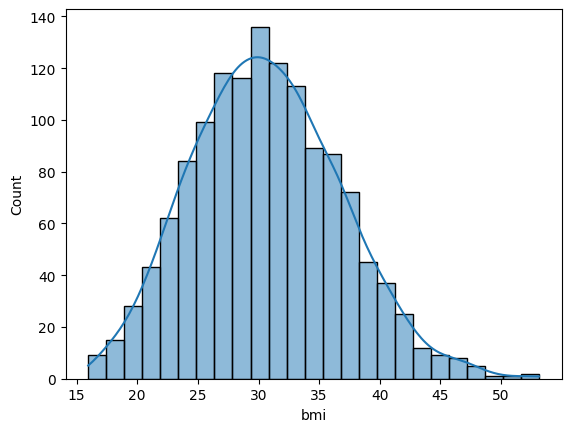

In [37]:
sns.histplot(df['bmi'], kde=True)

In [38]:

df2['bmi_category'] = pd.cut(
    df2['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)

In [39]:
df2

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,19,0,27,0,1,16884,0,0,1,Overweight
1,18,1,33,1,0,1725,0,1,0,Obese
2,28,1,33,3,0,4449,0,1,0,Obese
3,33,1,22,0,0,21984,1,0,0,Normal
4,32,1,28,0,0,3866,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,Obese
1334,18,0,31,0,0,2205,0,0,0,Obese
1335,18,0,36,0,0,1629,0,1,0,Obese
1336,21,0,25,0,0,2007,0,0,1,Overweight


In [40]:
df2 = pd.get_dummies(df2, columns=['bmi_category'], drop_first=True)

In [41]:
df2

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,0,27,0,1,16884,0,0,1,False,True,False
1,18,1,33,1,0,1725,0,1,0,False,False,True
2,28,1,33,3,0,4449,0,1,0,False,False,True
3,33,1,22,0,0,21984,1,0,0,True,False,False
4,32,1,28,0,0,3866,1,0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30,3,0,10600,1,0,0,False,False,True
1334,18,0,31,0,0,2205,0,0,0,False,False,True
1335,18,0,36,0,0,1629,0,1,0,False,False,True
1336,21,0,25,0,0,2007,0,0,1,False,True,False


In [47]:
df2.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1,0,0,0,1,16884,0,0,1,0,1,0
1,-1,1,0,0,0,1725,0,1,0,0,0,1
2,0,1,0,1,0,4449,0,1,0,0,0,1
3,0,1,-1,0,0,21984,1,0,0,1,0,0
4,0,1,0,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,1,0,10600,1,0,0,0,0,1
1334,-1,0,0,0,0,2205,0,0,0,0,0,1
1335,-1,0,0,0,0,1629,0,1,0,0,0,1
1336,-1,0,0,0,0,2007,0,0,1,0,1,0


In [45]:

from sklearn.preprocessing import StandardScaler
cols = ['age','bmi','children']
scaler = StandardScaler()

df2[cols] = scaler.fit_transform(df2[cols])

In [50]:
df2.astype(int)

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1,0,0,0,1,16884,0,0,1,0,1,0
1,-1,1,0,0,0,1725,0,1,0,0,0,1
2,0,1,0,1,0,4449,0,1,0,0,0,1
3,0,1,-1,0,0,21984,1,0,0,1,0,0
4,0,1,0,0,0,3866,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0,1,0,1,0,10600,1,0,0,0,0,1
1334,-1,0,0,0,0,2205,0,0,0,0,0,1
1335,-1,0,0,0,0,1629,0,1,0,0,0,1
1336,-1,0,0,0,0,2007,0,0,1,0,1,0


In [52]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]

correlations = {
    feature: pearsonr(df2[feature], df2['charges'])[0]
    for feature in selected_features
}
correlation_df2 = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df2.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298309
10,bmi_category_Obese,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
2,children,0.067390
3,is_female,0.058046
5,region_northwest,-0.038695
7,region_southwest,-0.043637
8,bmi_category_Normal,-0.104042


In [54]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'
]


In [56]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df2['charges_bin'] = pd.qcut(df2['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df2[col], df2['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df2 = pd.DataFrame(chi2_results).T
chi2_df2 = chi2_df2.sort_values(by='p_value')
chi2_df2

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,8.515711,0.036473,Reject Null (Keep Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null (Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [59]:
final_df2 = df2[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast','bmi_category_Obese']]

In [61]:
final_df2

,age,is_female,bmi,children,is_smoker,charges,region_southeast,bmi_category_Obese
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,False
1,-1.511647,1,0.462463,-0.079442,0,1725,1,True
2,-0.799350,1,0.462463,1.580143,0,4449,1,True
3,-0.443201,1,-1.334960,-0.909234,0,21984,0,False
4,-0.514431,1,-0.354547,-0.909234,0,3866,0,False
...,...,...,...,...,...,...,...,...
1333,0.767704,1,-0.027743,1.580143,0,10600,0,True
1334,-1.511647,0,0.135659,-0.909234,0,2205,0,True
1335,-1.511647,0,0.952670,-0.909234,0,1629,1,True
1336,-1.297958,0,-0.844753,-0.909234,0,2007,0,False


In [62]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
